In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/TransBorderFreight_Data_Analysis/'
file_name ='combined_data.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(file_path+file_name, low_memory=False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19587500 entries, 0 to 19587499
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       float64
 1   TRDTYPE          float64
 2   USASTATE         object 
 3   DEPE             object 
 4   DISAGMOT         float64
 5   MEXSTATE         object 
 6   CANPROV          object 
 7   COUNTRY          float64
 8   VALUE            float64
 9   SHIPWT           float64
 10  FREIGHT_CHARGES  float64
 11  DF               float64
 12  CONTCODE         object 
 13  MONTH            float64
 14  YEAR             float64
 15  COMMODITY2       float64
dtypes: float64(11), object(5)
memory usage: 2.3+ GB


In [ ]:
data.columns

Index(['Unnamed: 0', 'TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE',
       'CANPROV', 'COUNTRY', 'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF',
       'CONTCODE', 'MONTH', 'YEAR', 'COMMODITY2'],
      dtype='object')

In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
data['QUARTER'] = data['MONTH'].apply(lambda month: (month - 1) // 3 + 1)

In [8]:
data['TRDTYPE'] = data['TRDTYPE'].astype(np.int64)
data['DISAGMOT'] = data['DISAGMOT'].astype(np.int64)
data['COUNTRY'] = data['COUNTRY'].astype(np.int64)

In [ ]:
data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,QUARTER
0,1,AK,07XX,3,NaN,XA,1220,3302.0,378.0,125.0,1.0,X,1.0,2020.0,NaN,1.0
1,1,AK,20XX,3,NaN,XA,1220,133362.0,137.0,1563.0,1.0,X,1.0,2020.0,NaN,1.0
2,1,AK,20XX,3,NaN,XA,1220,49960.0,66.0,2631.0,2.0,X,1.0,2020.0,NaN,1.0
3,1,AK,20XX,3,NaN,XC,1220,21184.0,3418.0,795.0,1.0,X,1.0,2020.0,NaN,1.0
4,1,AK,20XX,3,NaN,XM,1220,4253.0,2.0,75.0,1.0,X,1.0,2020.0,NaN,1.0


In [ ]:
data.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR,COMMODITY2,QUARTER
count,1.958750e+07,1.958750e+07,1.958750e+07,1.958750e+07,1.958750e+07,1.958750e+07,1.300578e+07,1.915804e+07,1.958750e+07,1.125488e+07,1.915804e+07
mean,1.336016e+00,4.802884e+00,1.524839e+03,2.889090e+06,1.213028e+06,3.872798e+04,1.327280e+00,4.275678e+00,2.021612e+03,5.701860e+01,1.792717e+00
std,4.723445e-01,1.251357e+00,3.845724e+02,5.236611e+07,5.682021e+07,1.425292e+06,4.692204e-01,2.874910e+00,1.159357e+00,2.770253e+01,9.274372e-01
min,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03,1.000000e+00,1.000000e+00
25%,1.000000e+00,5.000000e+00,1.220000e+03,1.475100e+04,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.021000e+03,3.400000e+01,1.000000e+00
50%,1.000000e+00,5.000000e+00,1.220000e+03,7.285100e+04,0.000000e+00,2.500000e+02,1.000000e+00,4.000000e+00,2.022000e+03,6.100000e+01,2.000000e+00
75%,2.000000e+00,5.000000e+00,2.010000e+03,4.256550e+05,2.663000e+03,2.739000e+03,2.000000e+00,6.000000e+00,2.022000e+03,8.400000e+01,2.000000e+00
max,2.000000e+00,9.000000e+00,2.010000e+03,5.034212e+10,8.399359e+10,2.354838e+09,2.000000e+00,1.200000e+01,2.024000e+03,9.900000e+01,4.000000e+00


In [ ]:
print("Missing values before filling:")
print(data.isnull().sum())

Missing values before filling:
TRDTYPE                   0
USASTATE                  0
DEPE               11254882
DISAGMOT                  0
MEXSTATE           13345389
CANPROV             7558259
COUNTRY                   0
VALUE                     0
SHIPWT                    0
FREIGHT_CHARGES           0
DF                  6581717
CONTCODE                  0
MONTH                429456
YEAR                      0
COMMODITY2          8332618
QUARTER              429456
dtype: int64


In [9]:
data.dropna(subset=['MONTH', 'QUARTER'], inplace=True)

data['DF'].fillna(3, inplace=True) # 3 - (UNKNOWN)
data['DEPE'].fillna('UNKNOWN', inplace=True) # Changing all nulls to 'UNKNOWN
data['COMMODITY2'].fillna(100, inplace=True) # 100 - (UNKNOWN)
print("\nMissing values after filling:")
print(data.isnull().sum())

/tmp/ipython-input-9-2428954577.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DF'].fillna(3, inplace=True) # 3 - (UNKNOWN)
/tmp/ipython-input-9-2428954577.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


Missing values after filling:
TRDTYPE                   0
USASTATE                  0
DEPE                      0
DISAGMOT                  0
MEXSTATE           13062488
CANPROV             7387141
COUNTRY                   0
VALUE                     0
SHIPWT                    0
FREIGHT_CHARGES           0
DF                        0
CONTCODE                  0
MONTH                     0
YEAR                      0
COMMODITY2                0
QUARTER                   0
dtype: int64


In [ ]:
data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,QUARTER
0,1,AK,07XX,3,NaN,XA,1220,3302.0,378.0,125.0,1.0,X,1.0,2020.0,100.0,1.0
1,1,AK,20XX,3,NaN,XA,1220,133362.0,137.0,1563.0,1.0,X,1.0,2020.0,100.0,1.0
2,1,AK,20XX,3,NaN,XA,1220,49960.0,66.0,2631.0,2.0,X,1.0,2020.0,100.0,1.0
3,1,AK,20XX,3,NaN,XC,1220,21184.0,3418.0,795.0,1.0,X,1.0,2020.0,100.0,1.0
4,1,AK,20XX,3,NaN,XM,1220,4253.0,2.0,75.0,1.0,X,1.0,2020.0,100.0,1.0


In [10]:
data['DF'] = data['DF'].astype(np.int64)
data['YEAR'] = data['YEAR'].astype(np.int64)
data['MONTH'] = data['MONTH'].astype(np.int64)
data['COMMODITY2'] = data['COMMODITY2'].astype(np.int64)
data['QUARTER'] = data['QUARTER'].astype(np.int64)

In [ ]:
data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,QUARTER
0,1,AK,07XX,3,NaN,XA,1220,3302.0,378.0,125.0,1,X,1,2020,100,1
1,1,AK,20XX,3,NaN,XA,1220,133362.0,137.0,1563.0,1,X,1,2020,100,1
2,1,AK,20XX,3,NaN,XA,1220,49960.0,66.0,2631.0,2,X,1,2020,100,1
3,1,AK,20XX,3,NaN,XC,1220,21184.0,3418.0,795.0,1,X,1,2020,100,1
4,1,AK,20XX,3,NaN,XM,1220,4253.0,2.0,75.0,1,X,1,2020,100,1


In [ ]:
data.isnull().sum()['MEXSTATE'] + data.isnull().sum()['CANPROV']

np.int64(20449629)

In [ ]:
# Identify rows where both 'MEXSTATE' and 'CANPROV' are not null
rows_to_remove = data[(data['MEXSTATE'].notna()) & (data['CANPROV'].notna())]

# Get the indices of these rows
indices_to_remove = rows_to_remove.index

# Remove the identified rows from the DataFrame
data.drop(indices_to_remove, inplace=True)

print(f"Removed {len(indices_to_remove)} rows where both MEXSTATE and CANPROV had values.")

# Verify the change

Removed 0 rows where both MEXSTATE and CANPROV had values.


In [ ]:
data['YEAR'].unique()

array([2020, 2021, 2022, 2023, 2024])

In [ ]:
data['QUARTER'].unique()

array([1, 2, 3, 4])

In [ ]:
data['MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [11]:
data['COUNTRY'] =  data['COUNTRY'].astype(np.int64)
data['COUNTRY_NAME'] = data['COUNTRY'].apply(lambda x: 'Canada' if x == 1220 else 'Mexico')

## Analyzing Exports

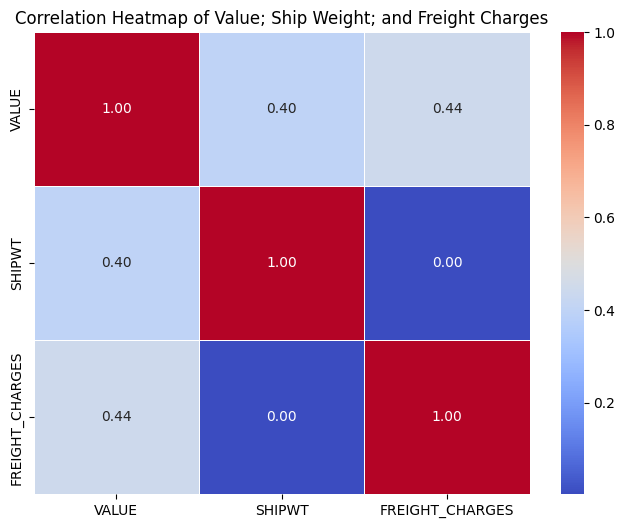

In [ ]:
# Filtering the data to only show Exports from the USA
filtered_data = data[data['TRDTYPE'] == 1]

import matplotlib.pyplot as plt
# Select relevant columns for correlation analysis
filtered_cols = ['VALUE', 'SHIPWT', 'FREIGHT_CHARGES']

# Calculate the correlation matrix
correlation_matrix = filtered_data[filtered_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Value; Ship Weight; and Freight Charges')
plt.show()

In [ ]:
data.columns

Index(['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE', 'CANPROV',
       'COUNTRY', 'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE',
       'MONTH', 'YEAR', 'COMMODITY2', 'QUARTER', 'COUNTRY_NAME'],
      dtype='object')

In [ ]:
# Mapping dictionary for DISAGMOT to transportation modes
commodity_mapping = {
        1 : "Vessel",
        3 : "Air",
        4 : "Mail (U.S. Postal Service)",
        5 : "Truck",
        6 : "Rail",
        7 : "Pipeline",
        8 : "Other",
        9 : "Foreign Trade Zones (FTZs)",
        10 : "Vessel",
        11 : "Foreign Trade Zones (FTZs)",
        12 : "Vessel"  ,
        13 : "Air",
        14 : "Mail (U.S. Postal Service)",
        15 : "Truck",
        16 : "Rail",
        17 : "Pipeline",
        18 : "Other",
        19 : "Foreign Trade Zones (FTZs)",
        20 : "Vessel"
}

# Create a new column 'TRANSPORT_MODE' by mapping 'DISAGMOT'
data['COMMODITY_NAME'] = data['COMMODITY2'].map(commodity_mapping)

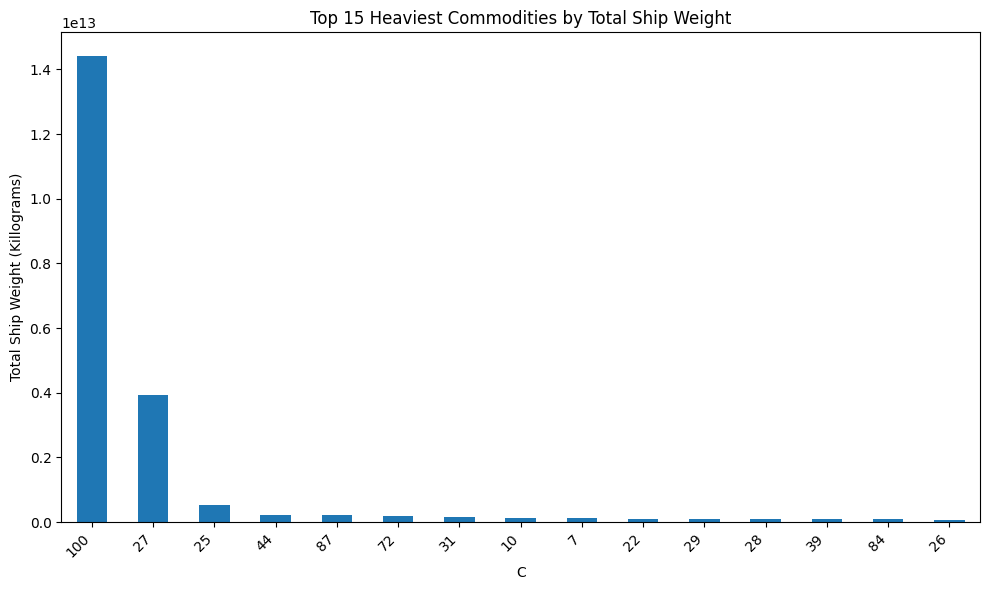

In [18]:
# Aggregate SHIPWT by COMMODITY2 and sort in descending order
filtered_data = data.groupby('COMMODITY2')['SHIPWT'].sum().sort_values(ascending=False).head(15)

# Plot the top 15 heaviest commodities
plt.figure(figsize=(10, 6))
filtered_data.plot(kind='bar')
plt.title('Top 15 Heaviest Commodities by Total Ship Weight')
plt.xlabel('C')
plt.ylabel('Total Ship Weight (Killograms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

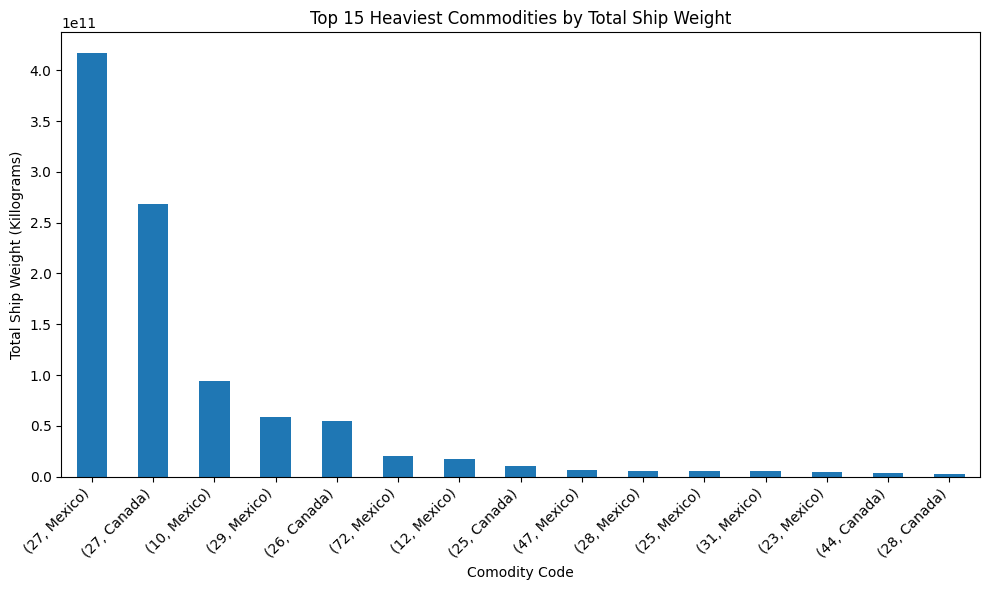

In [ ]:
# Filtering the data to only show Exports from the USA
filtered_data = data[data['TRDTYPE'] == 1]

# Aggregate SHIPWT by COMMODITY2 and sort in descending order
filtered_data = filtered_data[filtered_data['COMMODITY2'] != 100].groupby(['COMMODITY2', 'COUNTRY_NAME'])['SHIPWT'].sum().sort_values(ascending=False).head(15)

# Plot the top 15 heaviest commodities
plt.figure(figsize=(10, 6))
filtered_data.plot(kind='bar')
plt.title('Top 15 Heaviest Commodities by Total Ship Weight')
plt.xlabel('Comodity Code')
plt.ylabel('Total Ship Weight (Killograms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

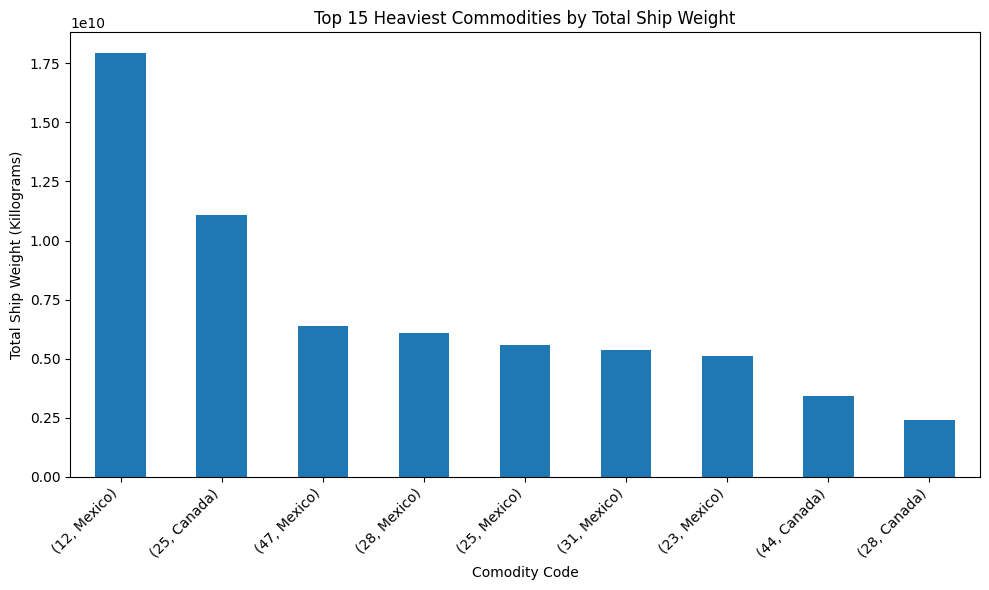

In [ ]:
# Filtering the data to only show Exports from the USA
filtered_data = data[data['TRDTYPE'] == 1]

# Aggregate SHIPWT by COMMODITY2 and sort in descending order
filtered_data = filtered_data[filtered_data['COMMODITY2'] != 100].groupby(['COMMODITY2', 'COUNTRY_NAME'])['SHIPWT'].sum().sort_values(ascending=False).head(15)

filtered_data = filtered_data.iloc[6:]

# Plot the top 15 heaviest commodities
plt.figure(figsize=(10, 6))
filtered_data.plot(kind='bar')
plt.title('Top 6 to 15 Heaviest Commodities by Total Ship Weight')
plt.xlabel('Comodity Code')
plt.ylabel('Total Ship Weight (Killograms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

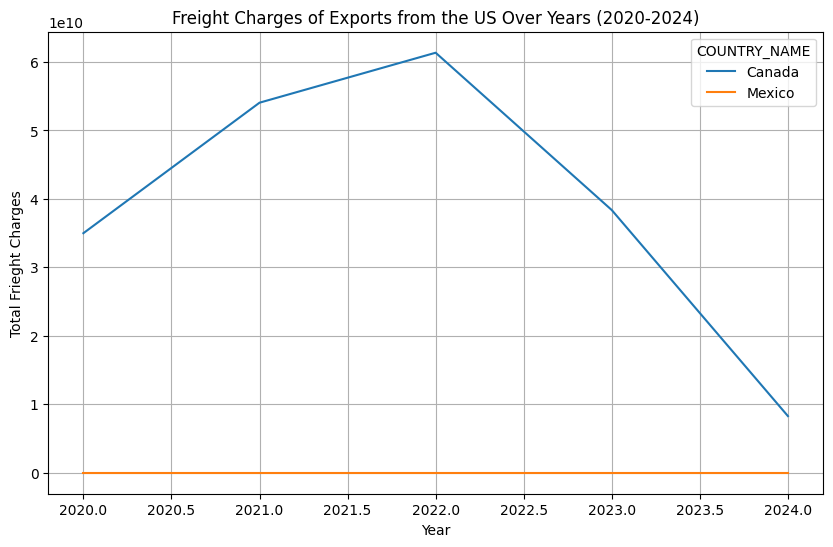

In [ ]:
# Group by Year and calculate the sum freight charges
filtered_data = data[data['TRDTYPE'] == 1]
filtered_data = filtered_data.groupby(['COUNTRY_NAME','YEAR'])['FREIGHT_CHARGES'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='YEAR', y='FREIGHT_CHARGES', hue='COUNTRY_NAME')
plt.title('Freight Charges of Exports from the US Over Years (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Total Frieght Charges ($)')
plt.grid(True)

plt.show()


In [ ]:
filtered_data

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,QUARTER,COUNTRY_NAME
8,1,AK,20XX,3,XX,NaN,2010,2970.0,1.0,0.0,1,0,1,2020,100,1,Mexico
9,1,AK,2304,5,CM,NaN,2010,125986.0,0.0,0.0,1,0,1,2020,100,1,Mexico
10,1,AK,2304,5,CM,NaN,2010,161281.0,0.0,0.0,2,0,1,2020,100,1,Mexico
11,1,AK,2304,5,CO,NaN,2010,20693.0,0.0,0.0,1,0,1,2020,100,1,Mexico
12,1,AK,2304,5,DF,NaN,2010,221080.0,0.0,0.0,1,0,1,2020,100,1,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19587479,1,CT,UNKNOWN,5,NL,NaN,2010,8556.0,0.0,0.0,1,0,1,2021,82,1,Mexico
19587480,1,CT,UNKNOWN,5,NL,NaN,2010,15338.0,0.0,0.0,2,0,1,2021,82,1,Mexico
19587481,1,CT,UNKNOWN,5,TM,NaN,2010,4350.0,0.0,0.0,1,0,1,2021,82,1,Mexico
19587486,1,CT,UNKNOWN,3,XX,NaN,2010,26900.0,210.0,0.0,1,0,1,2021,83,1,Mexico


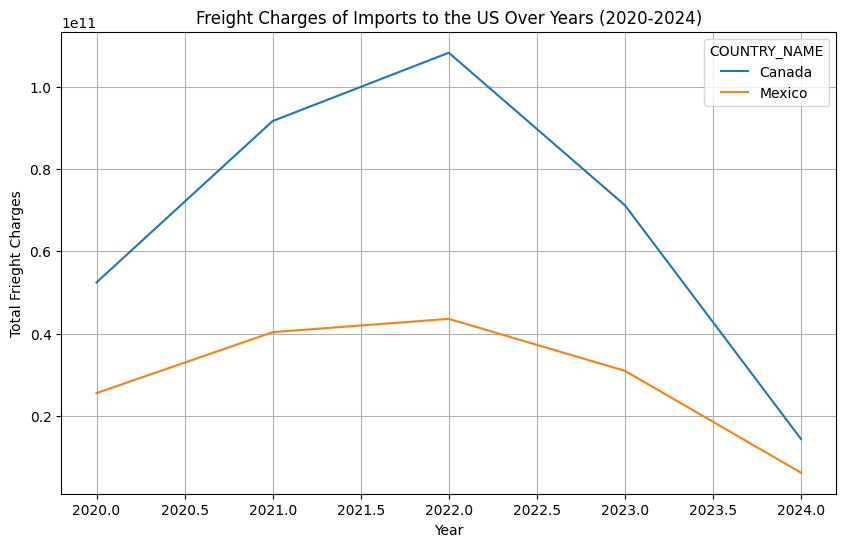

In [ ]:
# Group by Year and calculate the sum freight charges
filtered_data = data[data['TRDTYPE'] == 2]
filtered_data = filtered_data.groupby(['COUNTRY_NAME','YEAR'])['FREIGHT_CHARGES'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='YEAR', y='FREIGHT_CHARGES', hue='COUNTRY_NAME')
plt.title('Freight Charges of Imports to the US Over Years (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Total Frieght Charges ($)')
plt.grid(True)

plt.show()

In [ ]:
# Mapping dictionary for DISAGMOT to transportation modes
disagmot_mapping = {
        1 : "Vessel",
        3 : "Air",
        4 : "Mail (U.S. Postal Service)",
        5 : "Truck",
        6 : "Rail",
        7 : "Pipeline",
        8 : "Other",
        9 : "Foreign Trade Zones (FTZs)",
}

# Create a new column 'TRANSPORT_MODE' by mapping 'DISAGMOT'
data['TRANSPORT_MODE'] = data['DISAGMOT'].map(disagmot_mapping)

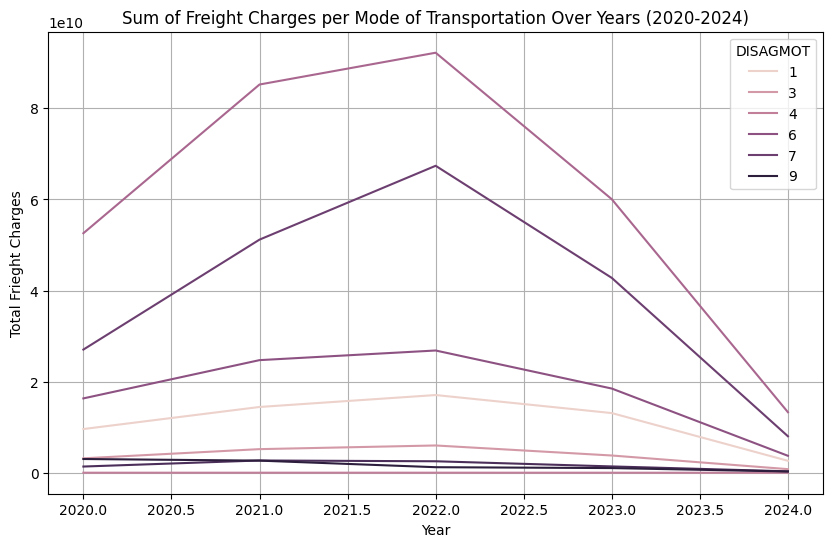

In [ ]:
# Group by Year and calculate the sum freight charges
filtered_data = data[data['TRDTYPE'] == 1]
filtered_data = data.groupby(['YEAR', 'TRANSPORT_MODE'])['FREIGHT_CHARGES'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, stacked=True, x='YEAR', y='FREIGHT_CHARGES', hue='DISAGMOT')
plt.title('Sum of Freight Charges per Mode of Transportation Over Years (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Total Frieght Charges')
plt.grid(True)

plt.show()

In [ ]:
# Group by Year and calculate the sum freight charges
filtered_data = data[data['TRDTYPE'] == 2]
filtered_data = data.groupby(['YEAR', 'DISAGMOT'])['FREIGHT_CHARGES'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='YEAR', y='FREIGHT_CHARGES', hue='DISAGMOT')
plt.title('Sum of Freight Charges per Mode of Transportation Over Years (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Total Frieght Charges')
plt.grid(True)

plt.show()

In [ ]:
# Group by Year and calculate the sum freight charges
filtered_data = data[data['TRDTYPE'] == 2]
filtered_data = data.groupby(['YEAR', 'DISAGMOT'])['FREIGHT_CHARGES'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='YEAR', y='FREIGHT_CHARGES', hue='DISAGMOT')
plt.title('Sum of Freight Charges per Mode of Transportation Over Years (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Total Frieght Charges')
plt.grid(True)

plt.show()

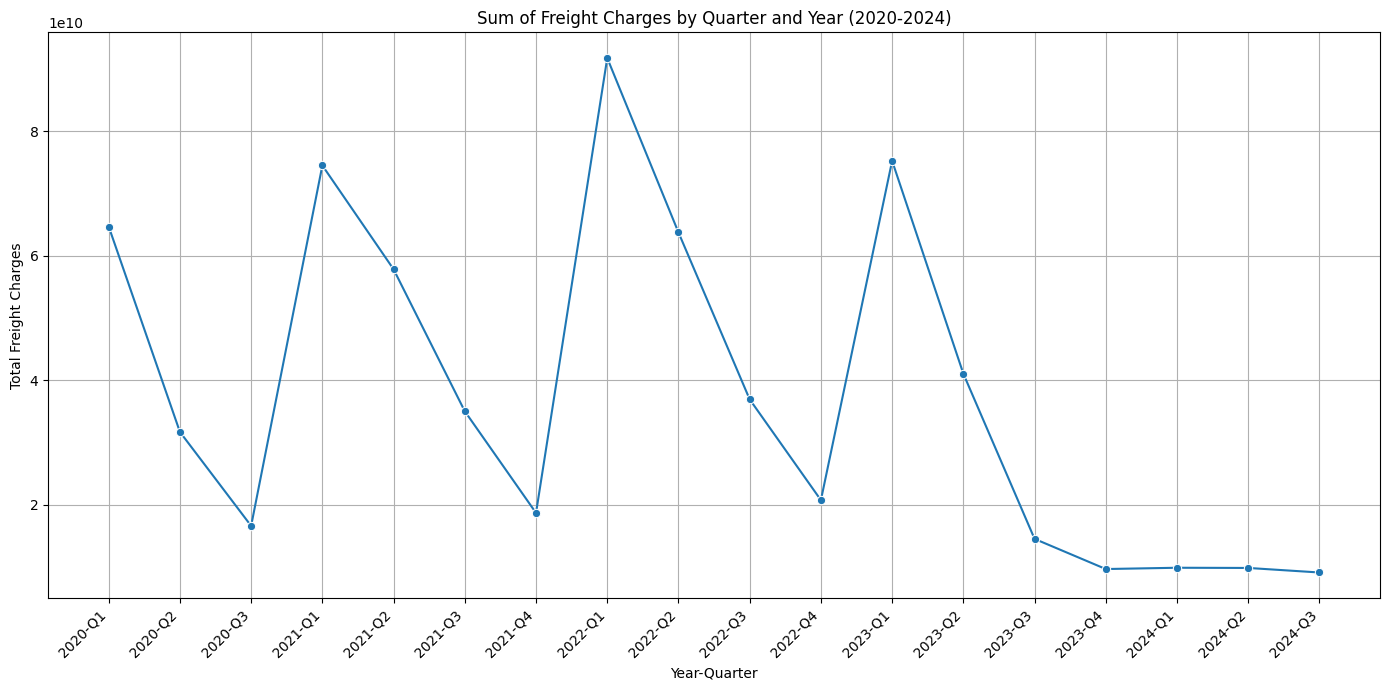

In [ ]:
# Group by Year and Quarter and calculate the sum of Freight Charges
freight_by_quarter_year = data.groupby(['YEAR', 'QUARTER'])['FREIGHT_CHARGES'].sum().reset_index()

# Create a combined 'Year-Quarter' column for plotting
freight_by_quarter_year['YEAR_QUARTER'] = freight_by_quarter_year['YEAR'].astype(str) + '-Q' + freight_by_quarter_year['QUARTER'].astype(str)

# Sort the data by Year and Quarter for proper time series plotting
freight_by_quarter_year['YEAR_QUARTER'] = pd.Categorical(freight_by_quarter_year['YEAR_QUARTER'],
                                                        categories=freight_by_quarter_year['YEAR_QUARTER'].unique(),
                                                        ordered=True)
freight_by_quarter_year = freight_by_quarter_year.sort_values(by='YEAR_QUARTER')

# Plot the trend by Quarter and Year
plt.figure(figsize=(14, 7))
sns.lineplot(data=freight_by_quarter_year, x='YEAR_QUARTER', y='FREIGHT_CHARGES', marker='o')
plt.title('Sum of Freight Charges by Quarter and Year (2020-2024)')
plt.xlabel('Year-Quarter')
plt.ylabel('Total Freight Charges')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
data['TRDTYPE'].unique()

array([1, 2])

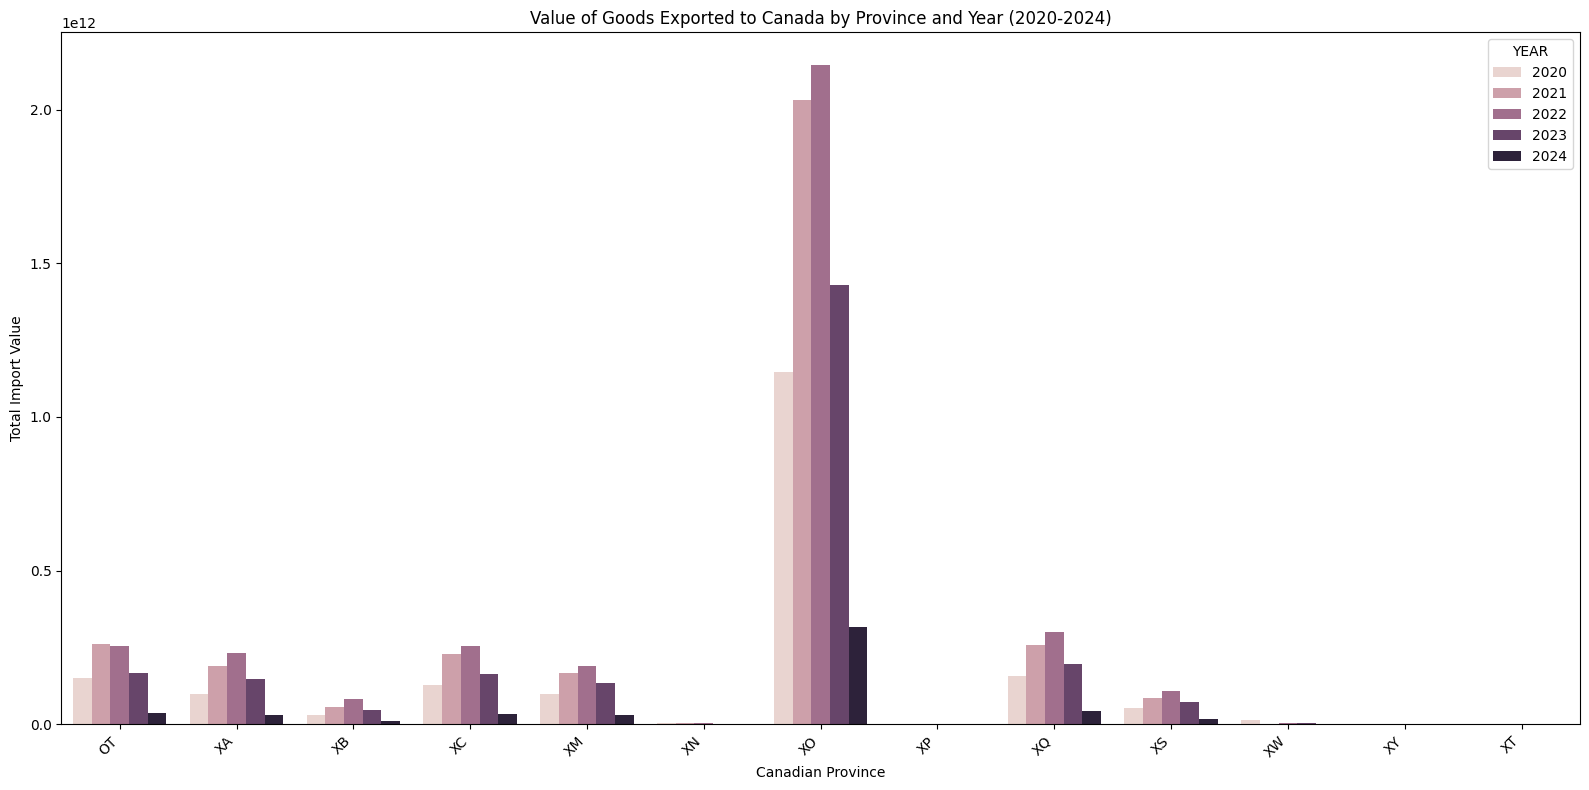

In [ ]:
# Filter for Canada as the destination country
canada_data = data[data['COUNTRY_NAME'] == 'Canada']

# Filter for imports (goods entering Canada)
canada_exports = canada_data[canada_data['TRDTYPE'] == 1]

# Group by YEAR and CANPROV (Canadian province) and sum the VALUE to get volume by value
canada_exports_by_province = canada_exports.groupby(['YEAR', 'CANPROV'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(16, 8))
sns.barplot(data=canada_exports_by_province, x='CANPROV', y='VALUE', hue='YEAR')
plt.title('Value of Goods Exported to Canada by Province and Year (2020-2024)')
plt.xlabel('Canadian Province')
plt.ylabel('Total Import Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

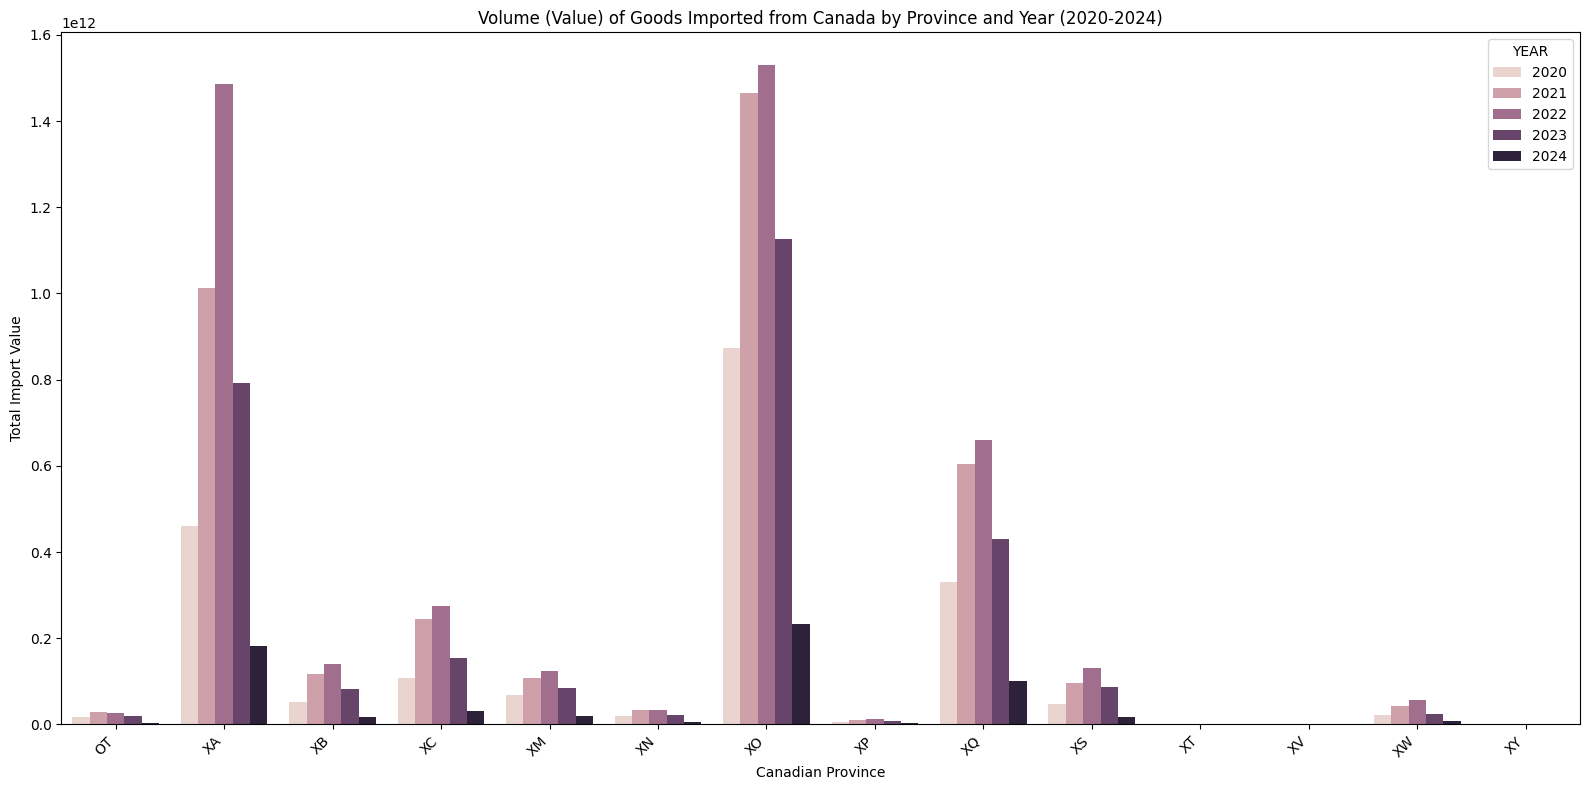

In [ ]:
# Filter for Canada as the destination country
canada_data = data[data['COUNTRY_NAME'] == 'Canada']

# Filter for imports (goods leaving for Canada)
canada_imports = canada_data[canada_data['TRDTYPE'] == 2]

# Group by YEAR and CANPROV (Canadian province) and sum the VALUE to get volume by value
canada_imports_by_province = canada_imports.groupby(['YEAR', 'CANPROV'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(16, 8))
sns.barplot(data=canada_imports_by_province, x='CANPROV', y='VALUE', hue='YEAR')
plt.title('Value of Goods Imported from Canada by Province and Year (2020-2024)')
plt.xlabel('Canadian Province')
plt.ylabel('Total Import Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

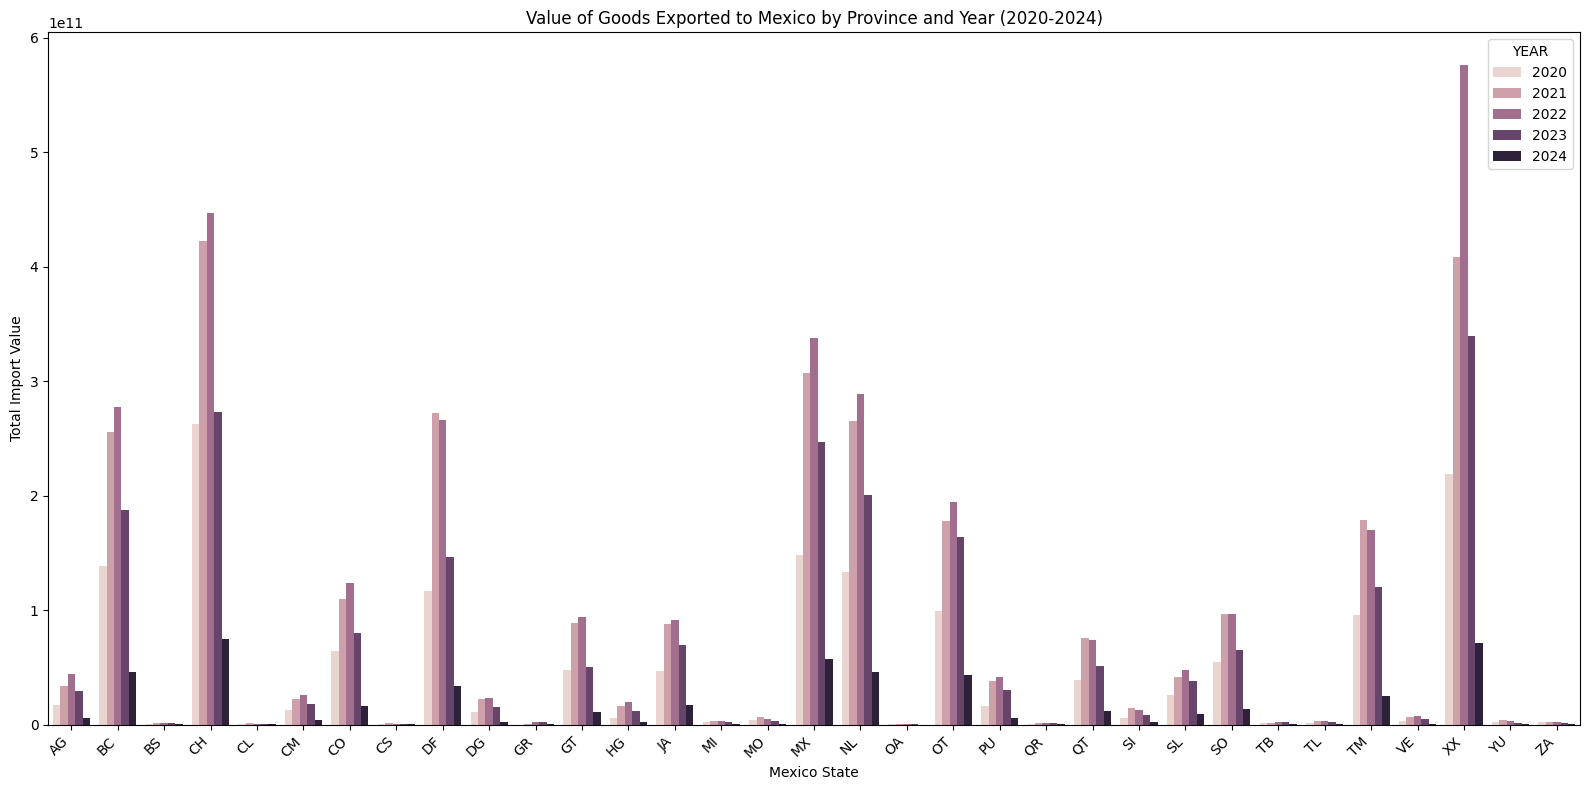

In [ ]:
# Filter for Canada as the destination country
mexico_data = data[data['COUNTRY_NAME'] == 'Mexico']

# Filter for imports (goods entering Canada)
mexico_exports = mexico_data[mexico_data['TRDTYPE'] == 1]

# Group by YEAR and MEXSTATE (Mexico State) and sum the VALUE to get volume by value
mexico_exports_by_state = mexico_exports.groupby(['YEAR', 'MEXSTATE'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(16, 8))
sns.barplot(data=mexico_exports_by_state, x='MEXSTATE', y='VALUE', hue='YEAR')
plt.title('Value of Goods Exported to Mexico by Province and Year (2020-2024)')
plt.xlabel('Mexico State')
plt.ylabel('Total Import Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

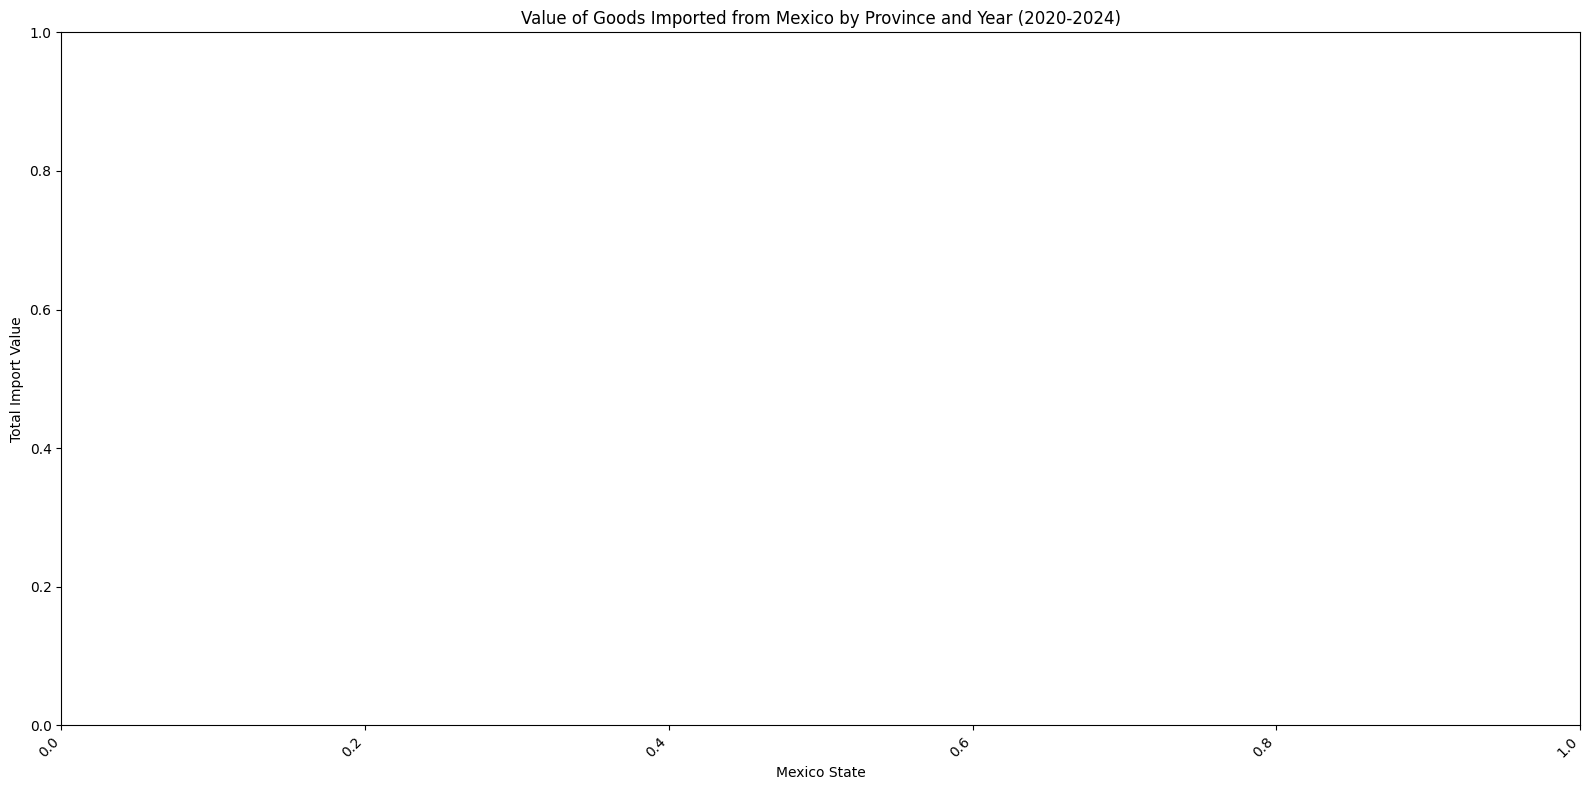

In [ ]:
# Filter for Canada as the destination country
mexico_data = data[data['COUNTRY_NAME'] == 'Mexico']

# Filter for imports (goods entering Canada)
mexico_exports = mexico_data[mexico_data['TRDTYPE'] == 2]

# Group by YEAR and MEXSTATE (Mexico State) and sum the VALUE to get volume by value
mexico_exports_by_state = mexico_exports.groupby(['YEAR', 'MEXSTATE'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(16, 8))
sns.barplot(data=mexico_exports_by_state, x='MEXSTATE', y='VALUE', hue='YEAR')
plt.title('Value of Goods Imported from Mexico by Province and Year (2020-2024)')
plt.xlabel('Mexico State')
plt.ylabel('Total Import Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Aggregate data
filtered_data = data[data['TRDTYPE'] == 1]
filtered_data = data.groupby(['YEAR', 'DISAGMOT']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
filtered_data.plot(kind='area', stacked=True, alpha=0.4, ax=plt.gca())
plt.title('Freight Volume by Mode Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Mode of Transportation')
plt.tight_layout()
plt.show()

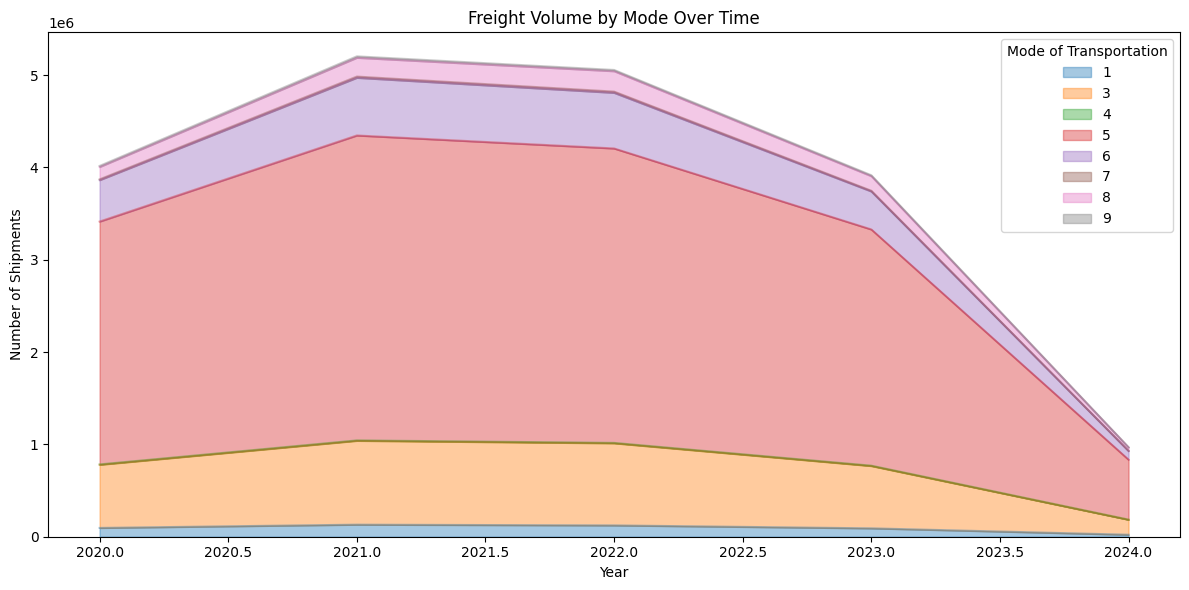

In [ ]:
# Aggregate data
filtered_data = data[data['TRDTYPE'] == 2]
filtered_data = data.groupby(['YEAR', 'DISAGMOT']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
filtered_data.plot(kind='area', stacked=True, alpha=0.4, ax=plt.gca())
plt.title('Freight Volume by Mode Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Mode of Transportation')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Sample top flows

state_country_flow = data.groupby(['USASTATE', 'COUNTRY_NAME']).size().reset_index(name='count')
state_country_flow = state_country_flow.sort_values(by='count', ascending=False)

source = list(set(state_country_flow['USASTATE'].unique().tolist() + state_country_flow['COUNTRY_NAME'].unique().tolist()))
label_to_idx = {label: i for i, label in enumerate(source)}

state_country_flow['source_idx'] = state_country_flow['USASTATE'].map(label_to_idx)
state_country_flow['target_idx'] = state_country_flow['COUNTRY_NAME'].map(label_to_idx)

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=source),
    link=dict(source=state_country_flow['source_idx'], target=state_country_flow['target_idx'],
              value=state_country_flow['count']))
])

fig.update_layout(title_text="Freight Flow Between US States and Countries", height=600)
fig.show()

In [ ]:
data.columns

Index(['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE', 'CANPROV',
       'COUNTRY', 'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE',
       'MONTH', 'YEAR', 'COMMODITY2', 'QUARTER', 'COUNTRY_NAME',
       'estimated_emissions', 'TRANSPORT_MODE'],
      dtype='object')

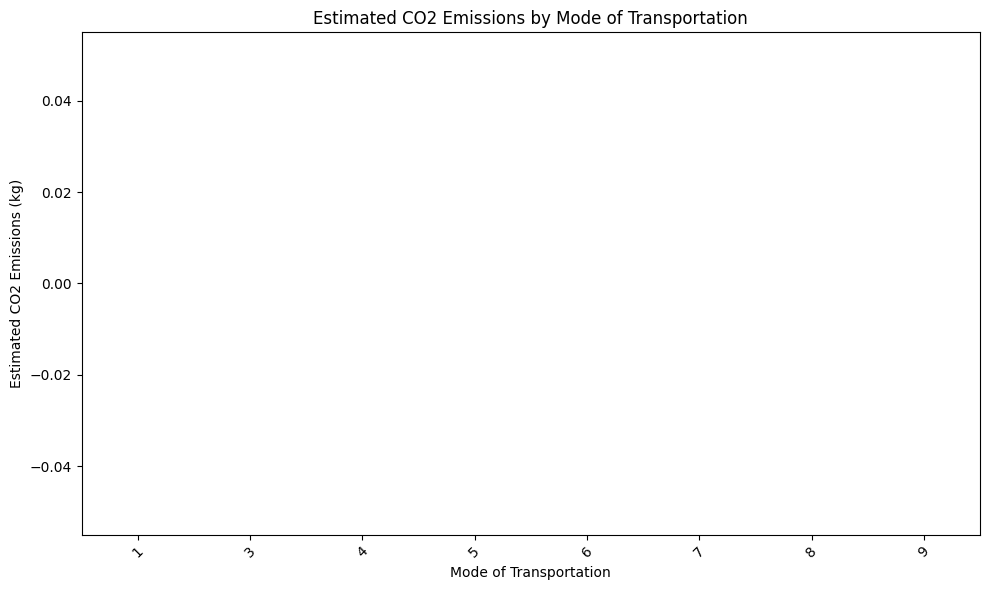

In [ ]:
# Define average emissions per ton-mile (example values in kg CO2)
emission_factor = {
    'Truck': 0.12,
    'Rail': 0.03,
    'Air': 0.18,
    'Sea': 0.02
}

# Apply estimated emissions
data['ESTIMATED_EMISSIONS'] = data['TRANSPORT_MODE'].map(emission_factor) * data['SHIPWT']

# Aggregate
emission_by_mode = data.groupby('TRANSPORT_MODE')['ESTIMATED_EMISSIONS'].sum().sort_values(ascending=False)

# Plot
emission_by_mode.plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Estimated CO2 Emissions by Mode of Transportation")
plt.xlabel("Mode of Transportation")
plt.ylabel("Estimated CO2 Emissions (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

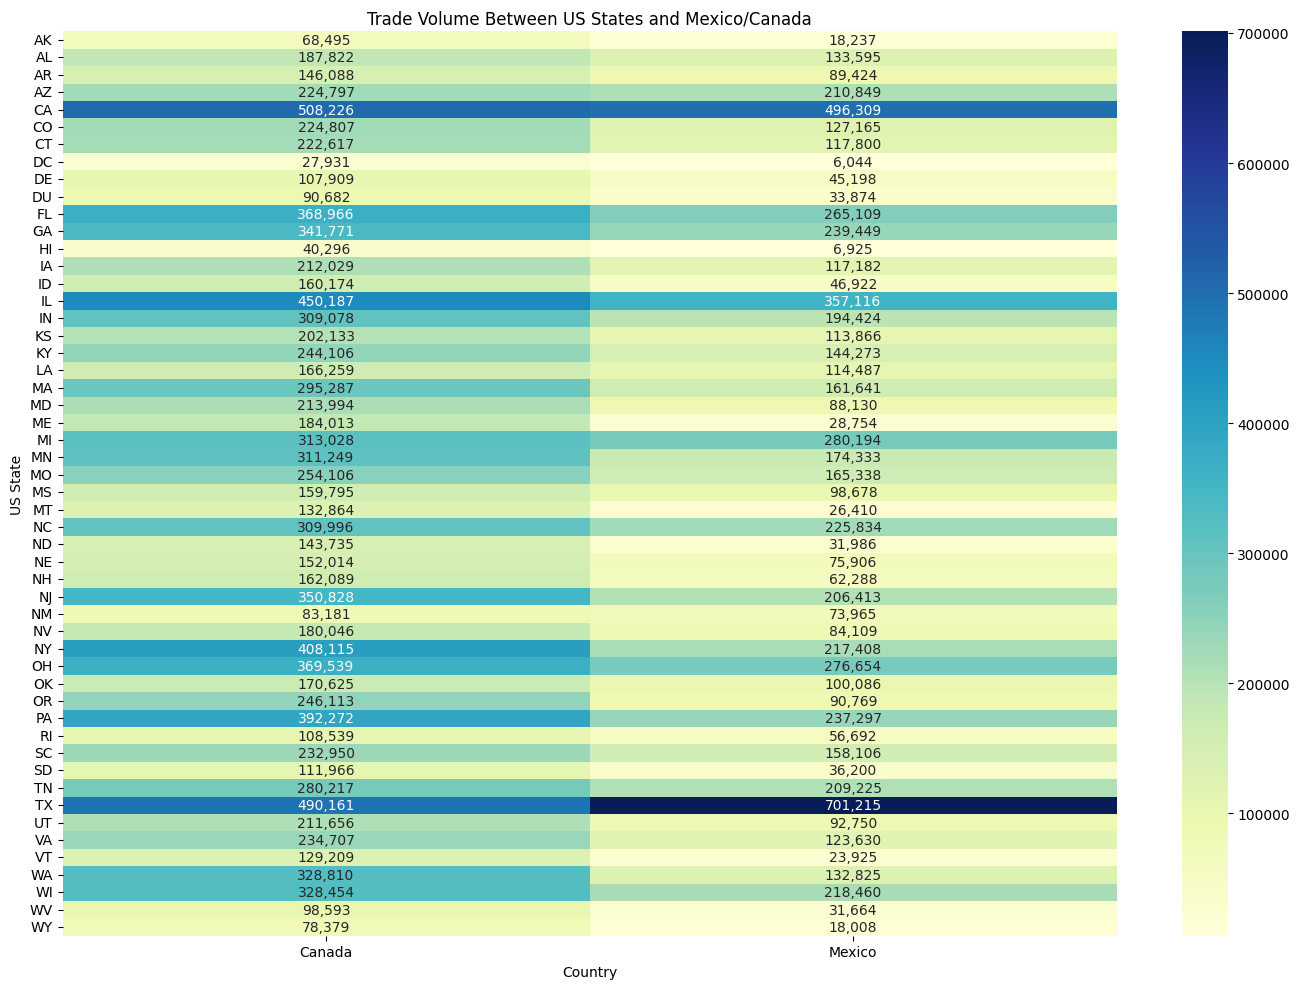

In [ ]:
# Aggregate data
filtered_data = data.groupby(['USASTATE', 'COUNTRY_NAME']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_data, annot=True, cmap="YlGnBu", fmt=",")
plt.title("Trade Volume Between US States and Mexico/Canada")
plt.ylabel("US State")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

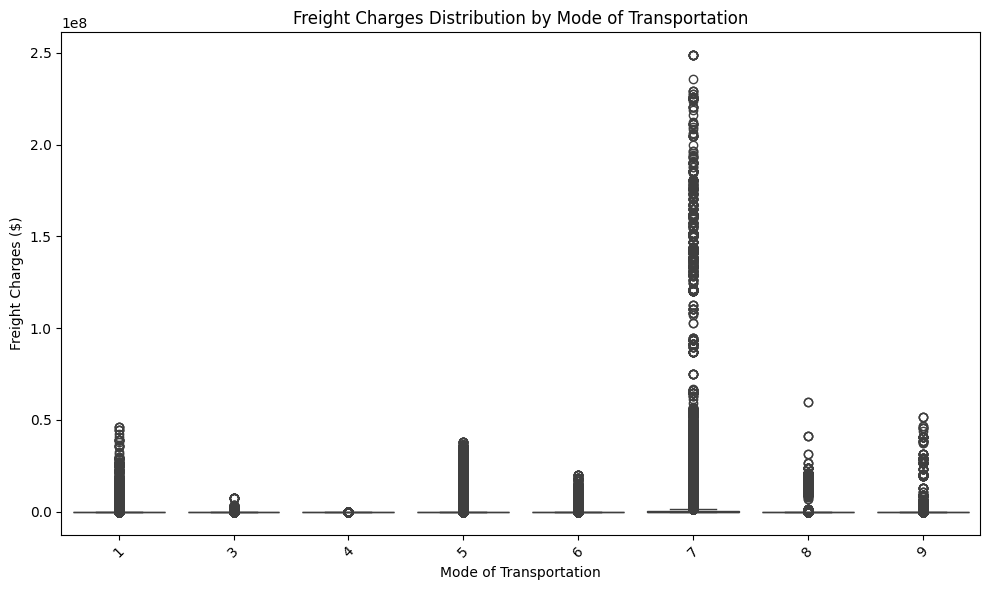

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DISAGMOT', y='FREIGHT_CHARGES', data=data)
plt.xticks(rotation=45)
plt.title("Freight Charges Distribution by Mode of Transportation")
plt.ylabel("Freight Charges ($)")
plt.xlabel("Mode of Transportation")
plt.tight_layout()
plt.show()

In [ ]:
# Group by port
filtered_data = data.groupby('DEPE').agg(
    num_shipments=('DEPE', 'count'),
    avg_charge=('FREIGHT_CHARGES', 'mean'),
    avg_weight=('SHIPWT', 'mean')
).reset_index()

# Add lat/long manually or load from external file
port_coords = {
    'LAX': [34.0522, -118.2437],
    'CHI': [41.8781, -87.6298],
    # ... add more ports
}

filtered_data['lat'] = filtered_data['DEPE'].map(lambda x: port_coords.get(x, [np.nan, np.nan])[0])
filtered_data['lon'] = filtered_data['DEPE'].map(lambda x: port_coords.get(x, [np.nan, np.nan])[1])

# Plot
import folium

m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

for _, row in filtered_data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row['num_shipments'] / 10,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Port: {row['DEPE']}<br>Shipments: {row['num_shipments']}<br>Avg Charge: ${row['avg_charge']:.2f}"
    ).add_to(m)

m.save("/content/drive/MyDrive/Colab Notebooks/TransBorderFreight_Data_Analysis/port_map.html")
print("Map saved to port_map.html")

ValueError: Location values cannot contain NaNs.

In [ ]:
# Filter high-cost, low-weight shipments
filtered_data = data[(data['FREIGHT_CHARGES'] > data['FREIGHT_CHARGES'].quantile(0.9)) &
                          (data['SHIPWT'] < data['SHIPWT'].quantile(0.1))]

# Check if the filtered data is empty
if filtered_data.empty:
    print("No shipments found matching the criteria (high freight charges and low ship weight).")
else:
    # Count by mode and port
    filtered_heatmap_data = filtered_data.groupby(['DISAGMOT', 'DEPE']).size().unstack(fill_value=0)

    # Plot
    plt.figure(figsize=(12, 8))
    sns.heatmap(filtered_heatmap_data, annot=True, cmap="Reds", fmt=",")
    plt.title("High-Cost/Low-Weight Shipments by Mode and Port")
    plt.ylabel("Mode of Transportation")
    plt.xlabel("Port/District Code")
    plt.tight_layout()
    plt.show()

No shipments found matching the criteria (high freight charges and low ship weight).


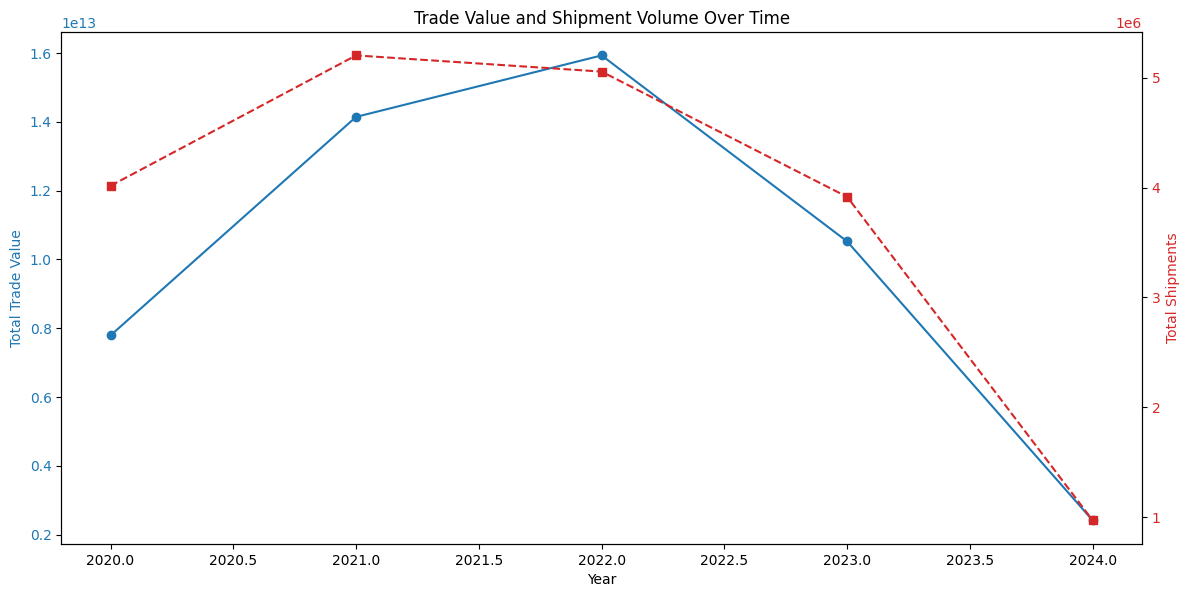

In [ ]:
# Aggregate
filtered_data = data[data['']]
filtered_data = data.groupby('YEAR').agg(total_value=('VALUE', 'sum'), total_cost=('FREIGHT_CHARGES', 'sum')).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Trade Value', color=color)
ax1.plot(filtered_data['YEAR'], filtered_data['total_value'], color=color, marker='o', label='Trade Value')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Shipments', color=color)
ax2.plot(filtered_data['YEAR'], filtered_data['total_cost'], color=color, marker='s', linestyle='--', label='Shipments')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Trade Value and Shipment Volume Over Time')
plt.show()